# Spread of Top 500 restaurants by city

## Objective
This program was written to create a bar plot of the Top 500 restaurants in Australia, to see how many of these restaurants are in each city.

### Comments:
This program reads in a CSV of cleansed data of the top 497 restaurants from the 5 largest cities in Australia. Three restaurants were removed from original dataset containing the top 500 restaurants in Australia due to these record containing incomplete data.

In [1]:
#Import required modules and styles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
#Read in required data and drop first column
df = pd.read_csv("../Project1_exploration/output_data/Top_497.csv")
restaurants = df.drop('Unnamed: 0', axis=1)
restaurants.head(3)

,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines
0,15547004,Restaurant Hubert,CBD,"15 Bligh Street, CBD, Sydney",Sydney,-33.865348,151.210624,4,150,4.9,Excellent,590,224,"French, European"
1,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,Excellent,1366,454,Modern Australian
2,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,Excellent,1234,329,Japanese


### Comments:
Group the cities and then count number of restaurants in each city

In [3]:
group_city = restaurants.groupby("City")
ave_user_rating = pd.DataFrame(group_city["User Rating"].mean())
ave_user_rating = ave_user_rating.round(decimals=2)
ave_user_rating

,User Rating
City,
Adelaide,4.39
Brisbane,4.51
Melbourne,4.67
Perth,4.47
Sydney,4.63


### Comments:
Create a bar graph of average user ratings across the 5 cities

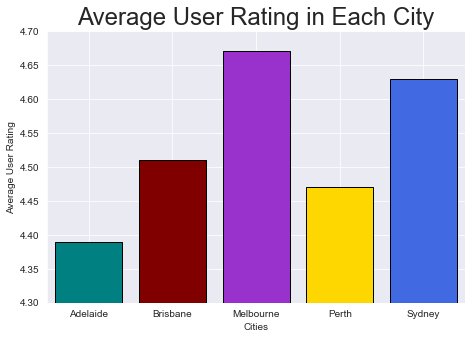

In [4]:
#Define the variables
x1 = [0,1,2,3,4]
y1 = [4.39,4.51,4.67,4.47,4.63]
colours = ['teal', 'maroon', 'darkorchid', 'gold', 'royalblue']

plt.bar(x1, y1, edgecolor='black', color=colours)

#Adjust size of graph
fig = plt.gcf()
fig.set_size_inches(7.5, 5)

#Set font sizes
small = 12
medium = 16
large = 24

plt.rc('font', size=medium)     
plt.rc('axes', titlesize=large)     
plt.rc('xtick', labelsize=small)   
plt.rc('ytick', labelsize=small)   
plt.rc('figure', titlesize=large)

#Add title, axis labels and gridlines
plt.title('Average User Rating in Each City')
plt.xlabel('Cities')
plt.ylabel('Average User Rating')
plt.xticks(np.arange(5), ('Adelaide', 'Brisbane', 'Melbourne', 'Perth', 'Sydney'))
plt.xlim(-0.5,len(ave_user_rating)-0.5)
plt.ylim(4.3,4.7)

#Save plot
plt.savefig("../Erica/AvUserRating500.png")

### Median User Rating
Calculating the required data

In [9]:
#Calculate the median user rating
group_city = restaurants.groupby("City")
median_user_rating = pd.DataFrame(group_city["User Rating"].median())
median_user_rating = median_user_rating.round(decimals=2)
median_user_rating

,User Rating
City,
Adelaide,4.35
Brisbane,4.50
Melbourne,4.60
Perth,4.40
Sydney,4.60


Creating the bar graph of median data

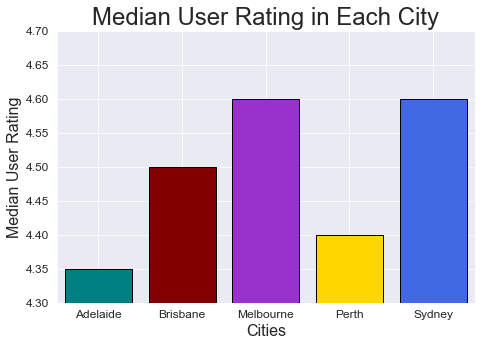

In [7]:
#Define the variables
x1 = [0,1,2,3,4]
y1 = [4.35,4.50,4.60,4.40,4.60]
colours = ['teal', 'maroon', 'darkorchid', 'gold', 'royalblue']

plt.bar(x1, y1, edgecolor='black', color=colours)

#Adjust size of graph
fig = plt.gcf()
fig.set_size_inches(7.5, 5)

#Set font sizes
small = 12
medium = 16
large = 24

plt.rc('font', size=medium)     
plt.rc('axes', titlesize=large)     
plt.rc('xtick', labelsize=small)   
plt.rc('ytick', labelsize=small)   
plt.rc('figure', titlesize=large)

#Add title, axis labels and gridlines
plt.title('Median User Rating in Each City')
plt.xlabel('Cities')
plt.ylabel('Median User Rating')
plt.xticks(np.arange(5), ('Adelaide', 'Brisbane', 'Melbourne', 'Perth', 'Sydney'))
plt.xlim(-0.5,len(median_user_rating)-0.5)
plt.ylim(4.3,4.7)

#Save plot
plt.savefig("../Erica/MedianUserRating500.png")

### Distribution of User Ratings per City

Calculating the required data

In [10]:
RatingsperCity=restaurants.groupby(['City'])['User Rating'].value_counts()
RatingsperCity

City       User Rating
Adelaide   4.3            33
           4.4            20
           4.2            16
           4.5            13
           4.6             7
           4.7             5
           4.8             2
           4.9             2
Brisbane   4.4            36
           4.5            35
           4.6            17
           4.7             8
           4.8             2
           4.9             2
Melbourne  4.6            56
           4.7            27
           4.8            10
           4.9             7
Perth      4.4            37
           4.3            20
           4.5            20
           4.6            10
           4.7             6
           4.8             3
           4.9             3
Sydney     4.6            42
           4.5            27
           4.7            16
           4.8             8
           4.9             7
Name: User Rating, dtype: int64

Creating a bar graph of distribution of user ratings per city

In [11]:
StackedRatings = RatingsperCity.unstack('User Rating').fillna(0)
StackedRatings

User Rating,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
City,,,,,,,,
Adelaide,16.0,33.0,20.0,13.0,7.0,5.0,2.0,2.0
Brisbane,0.0,0.0,36.0,35.0,17.0,8.0,2.0,2.0
Melbourne,0.0,0.0,0.0,0.0,56.0,27.0,10.0,7.0
Perth,0.0,20.0,37.0,20.0,10.0,6.0,3.0,3.0
Sydney,0.0,0.0,0.0,27.0,42.0,16.0,8.0,7.0


In [30]:
#Define the variables
R42 = [16.0,0,0,0,0]
R43 = [33.0,0,0,20.0,0]
R44 = [20.0,36.0,0,37.0,0]
R45 = [13.0,35.0,0,20.0,27.0]
R46 = [7.0,17.0,56.0,10.0,42.0]
R47 = [5.0,8.0,27.0,6.0,16.0]
R48 = [2.0,2.0,10.0,3.0,8.0]
R49 = [2.0,2.0,7.0,3.0,7.0]

colours = ['slategray', 'lightslategray', 'lightsteelblue', 'thistle', 'violet', 'orchid', 'mediumorchid', 'darkorchid', 'indigo']

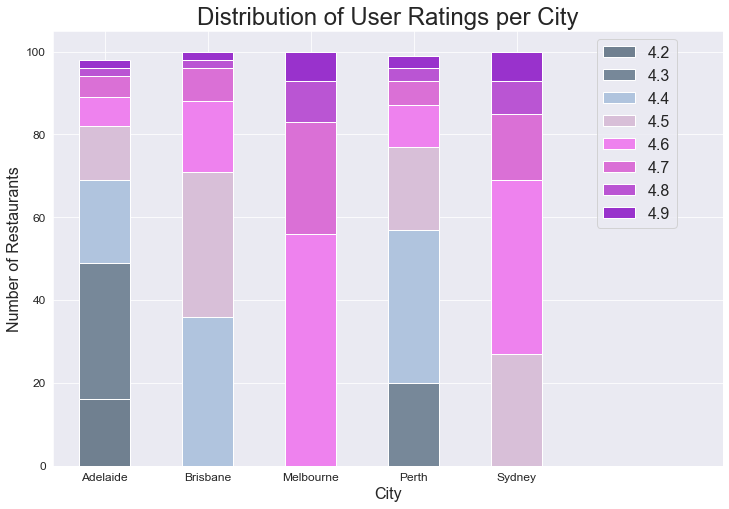

In [36]:
StackedRatings.plot(kind='bar', stacked=True, color=colours, legend=False, rot=0).legend(bbox_to_anchor=(0.8, 1))

#Adjust size of graph
fig = plt.gcf()
fig.set_size_inches(12, 8)

# Set textual properties
plt.title("Distribution of User Ratings per City")
plt.ylabel("Number of Restaurants")
plt.xlim(-0.5,len(StackedRatings)+1)
plt.ylim(0,105)

#Save plot
plt.savefig("../Erica/StackedRatings500.png")